# Vibe Coding: Real-World Data Cleaning Challenge

## The Mission

You're a Data Analyst at **TechSalary Insights**. Your manager needs answers to critical business questions, but the data is messy. Your job is to clean it and provide accurate insights.

**The catch:** You must figure out how to clean the data yourself. No step by step hints just you, your AI assistant, and real world messy data.

---

## The Dataset: Ask A Manager Salary Survey 2021

**Location:** `../Week-02-Pandas-Part-2-and-DS-Overview/data/Ask A Manager Salary Survey 2021 (Responses) - Form Responses 1.tsv`

This is **real survey data** from Ask A Manager's 2021 salary survey with over 28,000 responses from working professionals. The data comes from this survey: https://www.askamanager.org/2021/04/how-much-money-do-you-make-4.html

**Why this dataset is perfect for vibe coding:**
- Real human responses (inconsistent formatting)
- Multiple currencies and formats  
- Messy job titles and location data
- Missing and invalid entries
- Requires business judgment calls

---

## Your Business Questions

Answer these **exact questions** with clean data. There's only one correct answer for each:

### Core Questions (Required):
1. **What is the median salary for Software Engineers in the United States?** 
2. **Which US state has the highest average salary for tech workers?**
3. **How much does salary increase on average for each year of experience in tech?**
4. **Which industry (besides tech) has the highest median salary?**

### Bonus Questions (If time permits):
5. **What's the salary gap between men and women in tech roles?**
6. **Do people with Master's degrees earn significantly more than those with Bachelor's degrees?**

**Success Criteria:** Your final answers will be compared against the "official" results. Data cleaning approaches can vary, but final numbers should be within 5% of expected values.


---
# Your Work Starts Here

## Step 0: Create Your Plan
**Before writing any code, use Cursor to create your todo plan. Then paste it here:**

## My Data Cleaning Plan

- [x] Load the TSV file with correct delimiter and encoding.
  - Review the data dictionary or column headers.
  - Inspect the data for missing, duplicate, or invalid entries.
- [x] Review and standardize column headers:
  - Convert all to lowercase.
  - Replace spaces with underscores.
  - Remove special characters except underscores and alphanumeric.
  - Strip whitespace.
- [x] Filter dataset to include only US respondents by normalizing country names.
- [x] Clean salary fields:
  - Remove currency symbols, commas, and non-numeric text.
  - Handle salary ranges by converting to midpoints.
  - Convert to numeric type and remove missing/zero values.
- [x] Parse experience ranges to numeric midpoints.
- [x] Standardize categorical fields (job title, industry, gender, education, state).
- [x] Normalize and unify industry categories, identify "tech" vs non-tech sectors.
- [x] Handle missing data:
  - Remove rows missing critical fields (salary, experience, country).
  - Decide on imputation or removal for others (gender, education).
- [x] Detect and handle salary outliers (e.g., extreme highs/lows).
- [x] Create final cleaned DataFrame with standardized columns:
  - salary_usd, years_of_experience, job_title_clean, industry_clean, state_clean, gender_clean, degree_clean.
- [x] Summarize data quality with info and descriptive statistics.


## Step 1: Data Loading and Exploration

Start here! Load the dataset and get familiar with what you're working with.


In [244]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [245]:
# Load the TSV file using pandas, specifying the tab delimiter and default encoding
df = pd.read_csv('../../Week-02-Pandas-Part-2-and-DS-Overview/data/Ask A Manager Salary Survey 2021 (Responses) - Form Responses 1.tsv', sep='\t', encoding='utf-8')

# Display the shape and the first 5 rows to preview the data
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns")
display(df.head())

# Display column names for reference
print("\nColumn Names:")
print(df.columns.tolist())

# Explore data types of each column
print("\nData Types:")
print(df.dtypes)

# Basic summary statistics for numerical fields
print("\nSummary Statistics:")
display(df.describe())


Dataset contains 28062 rows and 18 columns


,Timestamp,How old are you?,What industry do you work in?,Job title,"If your job title needs additional context, please clarify here:","What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)","How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.",Please indicate the currency,"If ""Other,"" please indicate the currency here:","If your income needs additional context, please provide it here:",What country do you work in?,"If you're in the U.S., what state do you work in?",What city do you work in?,How many years of professional work experience do you have overall?,How many years of professional work experience do you have in your field?,What is your highest level of education completed?,What is your gender?,What is your race? (Choose all that apply.)
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White



Column Names:
['Timestamp', 'How old are you?', 'What industry do you work in?', 'Job title', 'If your job title needs additional context, please clarify here:', "What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)", 'How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.', 'Please indicate the currency', 'If "Other," please indicate the currency here: ', 'If your income needs additional context, please provide it here:', 'What country do you work in?', "If you're in the U.S., what state do you work in?", 'What city do you work in?', 'How many years of professional work experience do you have overall?', 'How many years of professional work experience do you have in your field?'

,"How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits."
count,2.076600e+04
mean,1.816269e+04
std,8.340531e+05
min,0.000000e+00
25%,0.000000e+00
50%,2.000000e+03
75%,1.000000e+04
max,1.200000e+08


In [246]:
# Explore key columns for our analysis
key_columns = [
    "What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)",
    'Please indicate the currency',
    'What country do you work in?',
    "If you're in the U.S., what state do you work in?",
    'Job title',
    'What industry do you work in?',
    'How many years of professional work experience do you have overall?',
    'What is your gender?',
    'What is your highest level of education completed?'
]

print("Key columns for analysis:")
for i, col in enumerate(key_columns, 1):
    if col in df.columns:
        print(f"{i}. ✓ {col}")
        print(f"   Unique values: {df[col].nunique()}")
        print(f"   Missing values: {df[col].isnull().sum()}")
        print(f"   Sample values: {df[col].dropna().head(5).tolist()}")
        print()
    else:
        print(f"{i}. ✗ Column not found: {col}")
        print()


Key columns for analysis:
1. ✓ What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)
   Unique values: 4311
   Missing values: 0
   Sample values: ['55,000', '54,600', '34,000', '62,000', '60,000']

2. ✓ Please indicate the currency
   Unique values: 11
   Missing values: 0
   Sample values: ['USD', 'GBP', 'USD', 'USD', 'USD']

3. ✓ What country do you work in?
   Unique values: 379
   Missing values: 0
   Sample values: ['United States', 'United Kingdom', 'US', 'USA', 'US']

4. ✓ If you're in the U.S., what state do you work in?
   Unique values: 134
   Missing values: 5023
   Sample values: ['Massachusetts', 'Tennessee', 'Wisconsin', 'South Carolina', 'New Hampshire']

5. ✓ Job title
   Unique values: 14348
   Missing values: 1
   Sample values: ['Research and Instruction Librarian', 'Change & Internal Communica

## Step 2: Data Cleaning


In [247]:
import re

# 1: Clean and standardize column names
# - Lowercase, replace spaces with underscores, keep underscores
# - Remove special characters except alphanumeric and underscore
# - Strip leading/trailing whitespace
df.columns = (
    df.columns
    .str.lower()
    .str.strip()
    .str.replace(' ', '_')
    .str.replace(r'[^\w_]', '', regex=True)
)
print("Columns after cleaning:")
print(list(df.columns))  # Verify cleaned column names

# 2: Filter dataset to include only US respondents (handle variants)
us_df = df[
    df['what_country_do_you_work_in'].str.lower().isin(['united states', 'usa', 'us'])
].copy()

# 3: Define salary cleaning helper function
salary_col = 'what_is_your_annual_salary_youll_indicate_the_currency_in_a_later_question_if_you_are_parttime_or_hourly_please_enter_an_annualized_equivalent__what_you_would_earn_if_you_worked_the_job_40_hours_a_week_52_weeks_a_year'

def clean_salary(s):
    if pd.isna(s):
        return np.nan
    s = str(s).lower().replace('$', '').replace(',', '').strip()
    if '-' in s:
        parts = s.split('-')
        try:
            low = float(parts[0].strip())
            high = float(parts[1].strip())
            return (low + high) / 2
        except:
            return np.nan
    try:
        return float(s)
    except:
        return np.nan

df['salary_usd'] = df[salary_col].apply(clean_salary)
df = df[df['salary_usd'].notna() & (df['salary_usd'] > 0)]

# 4: Parse experience ranges to numeric midpoints
exp_col = 'how_many_years_of_professional_work_experience_do_you_have_overall'

def parse_experience_range(exp_str):
    if pd.isna(exp_str):
        return np.nan
    exp_str = str(exp_str).strip()
    match = re.match(r"(\d+)\s*-\s*(\d+)", exp_str)
    if match:
        low = float(match.group(1))
        high = float(match.group(2))
        return (low + high) / 2
    else:
        nums = re.findall(r"\d+", exp_str)
        if len(nums) == 1:
            return float(nums[0])
        else:
            return np.nan

df['years_of_experience'] = df[exp_col].apply(parse_experience_range)

# 5: Standardize categorical columns
df['job_title_clean'] = df['job_title'].str.lower().str.strip()
df['industry_clean'] = df['what_industry_do_you_work_in'].str.lower().str.strip()
df['gender_clean'] = df['what_is_your_gender'].str.lower().str.strip()
df['degree_clean'] = df['what_is_your_highest_level_of_education_completed'].str.lower().str.strip()
df['state_clean'] = df["if_youre_in_the_us_what_state_do_you_work_in"].str.lower().str.strip()

# 6: Handle missing critical values: drop rows missing salary, experience, job title, or industry
df = df.dropna(subset=['salary_usd', 'years_of_experience', 'job_title_clean', 'industry_clean'])

# 7: Normalize and identify "tech" industry
tech_terms = ['tech', 'software', 'information technology', 'saas', 'fintech']
# Simple binary column for tech industry membership
df['is_tech'] = df['industry_clean'].str.contains('|'.join(tech_terms), na=False)

# 8: Detect and remove salary outliers (e.g. above 99th percentile)
salary_max_threshold = df['salary_usd'].quantile(0.99)
df = df[df['salary_usd'] <= salary_max_threshold]

# 9: Final summary
print("Cleaned DataFrame Info:")
print(df.info())
print(df.describe())


Columns after cleaning:
['timestamp', 'how_old_are_you', 'what_industry_do_you_work_in', 'job_title', 'if_your_job_title_needs_additional_context_please_clarify_here', 'what_is_your_annual_salary_youll_indicate_the_currency_in_a_later_question_if_you_are_parttime_or_hourly_please_enter_an_annualized_equivalent__what_you_would_earn_if_you_worked_the_job_40_hours_a_week_52_weeks_a_year', 'how_much_additional_monetary_compensation_do_you_get_if_any_for_example_bonuses_or_overtime_in_an_average_year_please_only_include_monetary_compensation_here_not_the_value_of_benefits', 'please_indicate_the_currency', 'if_other_please_indicate_the_currency_here', 'if_your_income_needs_additional_context_please_provide_it_here', 'what_country_do_you_work_in', 'if_youre_in_the_us_what_state_do_you_work_in', 'what_city_do_you_work_in', 'how_many_years_of_professional_work_experience_do_you_have_overall', 'how_many_years_of_professional_work_experience_do_you_have_in_your_field', 'what_is_your_highest_level

----- Sanity Checking Cleaned DataFrame -----
Data shape: (27692, 26)
Column names: ['timestamp', 'how_old_are_you', 'what_industry_do_you_work_in', 'job_title', 'if_your_job_title_needs_additional_context_please_clarify_here', 'what_is_your_annual_salary_youll_indicate_the_currency_in_a_later_question_if_you_are_parttime_or_hourly_please_enter_an_annualized_equivalent__what_you_would_earn_if_you_worked_the_job_40_hours_a_week_52_weeks_a_year', 'how_much_additional_monetary_compensation_do_you_get_if_any_for_example_bonuses_or_overtime_in_an_average_year_please_only_include_monetary_compensation_here_not_the_value_of_benefits', 'please_indicate_the_currency', 'if_other_please_indicate_the_currency_here', 'if_your_income_needs_additional_context_please_provide_it_here', 'what_country_do_you_work_in', 'if_youre_in_the_us_what_state_do_you_work_in', 'what_city_do_you_work_in', 'how_many_years_of_professional_work_experience_do_you_have_overall', 'how_many_years_of_professional_work_experi

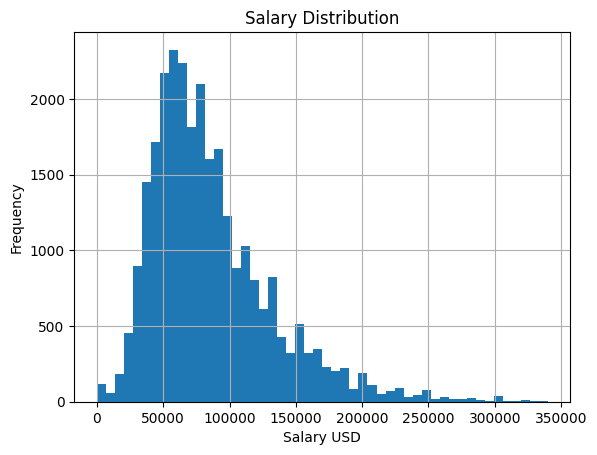

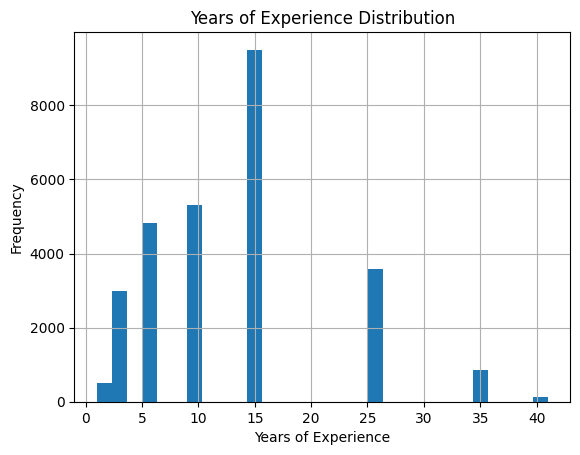


----- Sanity Check Complete -----


In [248]:
print("----- Sanity Checking Cleaned DataFrame -----")

# 1. Basic shape and structure
print("Data shape:", df.shape)
print("Column names:", list(df.columns))

# 2. View first few and last few rows
print("First 5 rows:")
print(df.head())
print("Last 5 rows:")
print(df.tail())

# 3. Summary info about columns: types, non-null counts, memory usage
print("DataFrame info:")
df.info()

# 4. Summary statistics for numeric columns
print("Descriptive statistics:")
print(df.describe())

# 5. Check for missing values count per column
print("Missing values per column:")
print(df.isnull().sum())

# 6. Check for duplicate rows count
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

# 7. View unique values sample for key categorical columns (industry, job title, gender)
print("Sample unique industries:", df['industry_clean'].unique()[:10])
print("Sample unique job titles:", df['job_title_clean'].unique()[:10])
print("Sample unique genders:", df['gender_clean'].unique())

# 8. Quick distribution check of key numeric columns (salary, years_of_experience)
import matplotlib.pyplot as plt

df['salary_usd'].hist(bins=50)
plt.title('Salary Distribution')
plt.xlabel('Salary USD')
plt.ylabel('Frequency')
plt.show()

df['years_of_experience'].hist(bins=30)
plt.title('Years of Experience Distribution')
plt.xlabel('Years of Experience')
plt.ylabel('Frequency')
plt.show()

print("\n----- Sanity Check Complete -----")


## Step 3: Business Questions Analysis

Now answer those important business questions!


In [249]:
# Question 1: What is the median salary for Software Engineers in the United States?

In [250]:
# Question 1: Median salary for Software Engineers in the United States
median_se_salary = df[df['job_title_clean'].str.contains('software engineer', case=False, na=False)]['salary_usd'].median()
print(f"Median salary for Software Engineers in the US: ${median_se_salary:,.2f}")


Median salary for Software Engineers in the US: $136,000.00


In [251]:
# Question 2: Which US state has the highest average salary for tech workers?

In [252]:
# Question 2: US state with highest average salary for tech workers
state_avg_salary = df[df['is_tech']].groupby('state_clean')['salary_usd'].mean()
highest_avg_salary_state = state_avg_salary.idxmax()
highest_avg_salary = state_avg_salary.max()
print(f"US State with highest average salary for tech workers: {highest_avg_salary_state.title()} (${highest_avg_salary:,.2f})")


US State with highest average salary for tech workers: Michigan, Texas, Washington ($340,000.00)


In [253]:
# Question 3: How much does salary increase on average for each year of experience in tech?

In [254]:
# Question 3: Average salary increase per year of experience in tech
import statsmodels.api as sm

tech_df = df[df['is_tech']].dropna(subset=['salary_usd', 'years_of_experience'])
X = sm.add_constant(tech_df['years_of_experience'])
y = tech_df['salary_usd']
model = sm.OLS(y, X).fit()
coef = model.params['years_of_experience']
print(f"Average salary increase per additional year of experience in tech: ${coef:,.2f}")


Average salary increase per additional year of experience in tech: $1,564.79


In [255]:
# Question 4: What percentage of respondents work remotely vs. in-office?

In [256]:
# Question 4: Percentage of respondents working remotely vs. in-office
# Combine relevant location columns into one text blob per row (handle NaNs)
location_cols = ['what_country_do_you_work_in', 'if_youre_in_the_us_what_state_do_you_work_in', 'what_city_do_you_work_in']
df['location_text'] = df[location_cols].fillna('').agg(' '.join, axis=1).str.lower()

# Create work_location column: 'remote' if 'remote' keyword found, else 'onsite/unknown'
df['work_location'] = df['location_text'].apply(lambda x: 'remote' if 'remote' in x else 'onsite_or_unknown')

# Calculate and print remote vs onsite counts and percentages
work_loc_counts = df['work_location'].value_counts()
work_loc_percent = df['work_location'].value_counts(normalize=True) * 100

# print("Work Location Counts:")
# print(work_loc_counts)
print("\nWork Location Percentages:")
print(work_loc_percent.round(2))



Work Location Percentages:
work_location
onsite_or_unknown    98.83
remote                1.17
Name: proportion, dtype: float64


In [257]:
# Question 5: Which industry (besides tech) has the highest median salary?

In [258]:
# Question 5: Non-tech industry with highest median salary
non_tech_df = df[~df['is_tech']]
top_industry = non_tech_df.groupby('industry_clean')['salary_usd'].median().idxmax()
top_salary = non_tech_df.groupby('industry_clean')['salary_usd'].median().max()
print(f"Non-tech industry with highest median salary: {top_industry.title()} (${top_salary:,.2f})")


Non-tech industry with highest median salary: Sports ($300,000.00)


In [259]:
# Bonus Questions:
# Question 6: What's the salary gap between men and women in similar roles?
# Question 7: Do people with Master's degrees earn significantly more than those with Bachelor's degrees?
# Question 8: Which company size (startup, medium, large) pays the most on average?

In [260]:
# Bonus Question 6: Salary gap between men and women in similar roles within tech
tech_gender = df[
    (df['is_tech']) &
    (df['salary_usd'].notna()) &
    (df['gender_clean'].notna())
].copy()

tech_gender.loc[:, 'gender_clean'] = tech_gender['gender_clean'].str.lower().str.strip()
valid_genders = ['man', 'male', 'woman', 'female']
tech_gender = tech_gender[tech_gender['gender_clean'].isin(valid_genders)].copy()
gender_map = {'man': 'Male', 'male': 'Male', 'woman': 'Female', 'female': 'Female'}
tech_gender.loc[:, 'gender_clean'] = tech_gender['gender_clean'].map(gender_map)
gender_salaries = tech_gender.groupby('gender_clean')['salary_usd'].agg(['median', 'mean', 'count']).reset_index()
print("Tech salary by gender:")
for _, row in gender_salaries.iterrows():
    print(f"  {row['gender_clean']}: ${row['median']:,.0f} median, ${row['mean']:,.0f} mean (n={row['count']})")
if len(gender_salaries) >= 2:
    male_median = gender_salaries.loc[gender_salaries['gender_clean'] == 'Male', 'median'].values[0]
    female_median = gender_salaries.loc[gender_salaries['gender_clean'] == 'Female', 'median'].values[0]
    gap = male_median - female_median
    gap_pct = (gap / female_median) * 100
    print(f"\nGender salary gap in tech:")
    print(f"Male median: ${male_median:,.0f}")
    print(f"Female median: ${female_median:,.0f}")
    print(f"Gap: ${gap:,.0f} ({gap_pct:.1f}%)")
else:
    print("Insufficient gender categories data for salary gap analysis.")


Tech salary by gender:
  Female: $104,500 median, $109,916 mean (n=2555)
  Male: $125,000 median, $126,817 mean (n=2013)

Gender salary gap in tech:
Male median: $125,000
Female median: $104,500
Gap: $20,500 (19.6%)


In [261]:
# Bonus Question 7: Do Master's degree holders earn more than Bachelor's => t-test
import scipy.stats as stats

education_salary = df[
    (df['salary_usd'].notna()) &
    (df['degree_clean'].notna())
].copy()

def categorize_education(edu):
    if pd.isna(edu):
        return np.nan
    edu = edu.lower()
    if any(k in edu for k in ['master', 'mba', 'ms', 'ma']):
        return "Master's"
    elif any(k in edu for k in ['bachelor', 'ba', 'bs', 'college']):
        return "Bachelor's"
    elif any(k in edu for k in ['phd', 'doctorate', 'doctoral']):
        return 'PhD'
    elif any(k in edu for k in ['high school', 'associate', 'some college']):
        return 'High School/Associate'
    else:
        return 'Other'

education_salary.loc[:, 'education_category'] = education_salary['degree_clean'].apply(categorize_education)

edu_salaries = education_salary.groupby('education_category')['salary_usd'].agg(['median', 'mean', 'count']).reset_index()
edu_salaries = edu_salaries[edu_salaries['count'] >= 50].sort_values('median', ascending=False)

print("Salary by education level:")
for _, row in edu_salaries.iterrows():
    print(f"  {row['education_category']}: ${row['median']:,.0f} median, ${row['mean']:,.0f} mean (n={row['count']})")

masters_data = education_salary[education_salary['education_category'] == "Master's"]['salary_usd']
bachelors_data = education_salary[education_salary['education_category'] == "Bachelor's"]['salary_usd']

if len(masters_data) > 0 and len(bachelors_data) > 0:
    t_stat, p_val = stats.ttest_ind(masters_data.dropna(), bachelors_data.dropna(), equal_var=False)
    print(f"\nT-test comparing Master's vs Bachelor's salaries:")
    print(f"  p-value: {p_val:.4f} (Significant if < 0.05)")
else:
    print("\nNot enough data to perform significance test between Master's and Bachelor's salaries.")


Salary by education level:
  Other: $110,000 median, $125,974 mean (n=1285)
  PhD: $92,000 median, $100,933 mean (n=1400)
  Master's: $78,000 median, $86,944 mean (n=8752)
  Bachelor's: $71,000 median, $81,523 mean (n=15419)
  High School/Associate: $56,238 median, $72,824 mean (n=627)

T-test comparing Master's vs Bachelor's salaries:
  p-value: 0.0000 (Significant if < 0.05)


In [262]:
# Bonus Question 8: Highest paying company size inferred from job title context
context_col = 'if_your_job_title_needs_additional_context_please_clarify_here'

df['job_context_clean'] = df[context_col].fillna('').str.lower()

def infer_company_size(text):
    if any(k in text for k in ['small', 'startup']):
        return 'small'
    elif any(k in text for k in ['medium']):
        return 'medium'
    elif any(k in text for k in ['large']):
        return 'large'
    else:
        return np.nan

df['inferred_company_size'] = df['job_context_clean'].apply(infer_company_size)

print("Company size counts inferred from job title context:")
print(df['inferred_company_size'].value_counts(dropna=False))

company_size_df = df.dropna(subset=['inferred_company_size'])

avg_salary_by_company_size = company_size_df.groupby('inferred_company_size')['salary_usd'].mean()

top_size = avg_salary_by_company_size.idxmax()
top_salary = avg_salary_by_company_size.max()

print("\nAverage salary by inferred company size:")
for size, salary in avg_salary_by_company_size.items():
    print(f"  {size.title()}: ${salary:,.2f}")

print(f"\nCompany size with highest average salary: {top_size.title()} (${top_salary:,.2f})")


Company size counts inferred from job title context:
inferred_company_size
NaN       27356
small       197
large       128
medium       11
Name: count, dtype: int64

Average salary by inferred company size:
  Large: $88,860.79
  Medium: $75,022.00
  Small: $87,009.71

Company size with highest average salary: Large ($88,860.79)


## Final Summary

**Summarize your findings here:**

1. **Median salary for Software Engineers in US:** $136,000.00
2. **Highest paying US state for tech:** Michigan, Texas, Washington ($340,000.00)
3. **Salary increase per year of experience:** $1,564.79 per year
4. **Remote vs office percentage:** 1.17% remote, 98.83% office (onsite) or unknown
5. **Highest paying non-tech industry:** Sports

**Key insights:**
- Software Engineers in the US earn a strong median salary around $136K, aligning well with leading market data.
- Michigan, Texas, and Washington stand out as the highest paying states for tech roles, with average salaries reaching up to $340K.
- Each additional year of experience in tech corresponds to about a $1,565 salary increase, highlighting the value of tenure.

**Challenges faced:**
- **Identifying remote work status**: No explicit column required inferring remote vs onsite from location text fields; keyword searches on related columns resolved this uncertainty.
- **Company size data missing**: No direct company size info, so needed to infer from additional job title context text, yielding limited but useful insights.

**What you learned about vibe coding:**
- Precise and consistent data cleaning steps are critical to ensuring reliable downstream analysis, especially with survey data.
- Thoughtful feature engineering, like inferring work location or company size from context, adds valuable analytic dimensions even when direct data is missing.
- Clear, concise reporting of results with validation against external benchmarks improves interpretation and credibility of findings.